In [5]:
import pandas as pd
import numpy as np

In [6]:
date_format = '%d.%m.%y %H:%M'

for i in range(1, 29):
    file_path = 'data/raw/subjectID_' + str(i) + '.csv'
    df = pd.read_csv(file_path)
    # if there is an acitivity class column, drop it
    if 'ActivityClass' in df.columns:
        df = df.drop(['ActivityClass'], axis=1)
    # if there is a galvanic skin response column, drop it
    if 'GalvanicSkinResponse' in df.columns:
        df = df.drop(['GalvanicSkinResponse'], axis=1)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format=date_format)
    print('subjectID_' + str(i) + ':')
    print('The number of weeks that the Timestamp column spans:')
    print(df['Timestamp'].max() - df['Timestamp'].min())
    print('The number of rows with missing values, and their percentage of the total number of rows:')
    print(df.isnull().sum() / df.shape[0] * 100)
    print('\n')


subjectID_1:
The number of weeks that the Timestamp column spans:
6 days 22:25:00
The number of rows with missing values, and their percentage of the total number of rows:
Timestamp             0.000000
ActivityCounts        5.998398
Barometer             5.998398
BloodPerfusion        6.429001
BloodPulseWave        6.429001
EnergyExpenditure     5.998398
HR                    6.429001
HRV                  21.299820
RESP                 10.294412
Steps                 5.998398
SkinTemperature       5.998398
dtype: float64


subjectID_2:
The number of weeks that the Timestamp column spans:
0 days 02:41:00
The number of rows with missing values, and their percentage of the total number of rows:
Timestamp            0.000000
ActivityCounts       0.000000
Barometer            0.000000
BloodPerfusion       0.000000
BloodPulseWave       0.000000
EnergyExpenditure    0.000000
HR                   0.000000
HRV                  8.641975
RESP                 4.320988
Steps                0.00000

In [7]:
fatiguePROs = pd.read_csv('data/fatiguePROs_processed.csv')
usable_segments = 0

In [8]:
date_format = '%d.%m.%y %H:%M'

file_path = 'data/raw/subjectID_24.csv'
df24 = pd.read_csv(file_path)
# create a new data frame that contains the 10 minute average of each column
df24['Timestamp'] = pd.to_datetime(df24['Timestamp'], format=date_format)
df24 = df24.drop(columns=['ActivityClass', 'GalvanicSkinResponse'])
df24 = df24.set_index('Timestamp')
df24 = df24.resample('10T').mean()  # '10T' stands for 10 minutes
df24 = df24.reset_index()


subject24_labels = fatiguePROs[fatiguePROs['SubjectID'] == 24]
subject24_labels.reset_index(drop=True, inplace=True)
# convert the Timestamp column to datetime type
subject24_labels['DateTime'] = pd.to_datetime(subject24_labels['DateTime'], format=date_format)
# find all timestamp that have missing values in the proanswers column
missing_proanswers = subject24_labels[subject24_labels['PROanswer_value'].isnull()].DateTime.unique()
# drop all rows that have the above timestamps
subject24_labels = subject24_labels[~subject24_labels['DateTime'].isin(missing_proanswers)]
subject24_labels.reset_index(drop=True, inplace=True)

unique_date_time = subject24_labels['DateTime'].unique()

# for each unique DateTime in subject24_labels, find the segment of df24 that are three days before the DateTime to the DateTime
# and append the segment to a new data frame
df24_5days = []
PROlabels_PhF = []
PROlabels_MF = []
PROlabels_VAS = []
PROlabels_RelP = []

for i in range(len(unique_date_time)):
    #  find the date of unique_date_time[i]

    start_date_time = max(unique_date_time[i] - pd.Timedelta(days=5), df24['Timestamp'].min())
    end_date_time = unique_date_time[i]
    
    segment = df24[(df24['Timestamp'] > start_date_time) & (df24['Timestamp'] <= end_date_time)]  
    # remove the timestamp column
    segment = segment.drop(columns=['Timestamp'])
    # if >=80% of the values in the segment are not NaN or None, append the segment to a new data frame
    if segment.size > 0 and segment.notnull().sum().sum() / segment.size >= 0.8:
        segment = segment.to_numpy()
        # print(segment.size)
        df24_5days.append(segment)
        # find the PROlabel that corresponds to the DateTime, append it to PROlabels
        PROlabel = subject24_labels[subject24_labels['DateTime'] == end_date_time]
        PROlabels_PhF.append(PROlabel[PROlabel['question'] == 'PhF'].PROanswer_value.values[0])
        PROlabels_MF.append(PROlabel[PROlabel['question'] == 'MF'].PROanswer_value.values[0])
        PROlabels_VAS.append(PROlabel[PROlabel['question'] == 'VAS'].PROanswer_value.values[0])
        PROlabels_RelP.append(PROlabel[PROlabel['question'] == 'RelP'].PROanswer_value.values[0])
usable_segments += len(df24_5days)
print(usable_segments)



/tmp/ipykernel_3378959/3217499638.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject24_labels['DateTime'] = pd.to_datetime(subject24_labels['DateTime'], format=date_format)


70


In [26]:
# repeat the above for every subject, do it in a for loop
# suppress the warnings
import warnings
warnings.filterwarnings('ignore')

usable_segments = 0
PROlabels_PhF = []
PROlabels_MF = []
PROlabels_VAS = []
PROlabels_RelP = []

for i in range(1, 29):
    file_path = 'data/raw/subjectID_' + str(i) + '.csv'
    df24 = pd.read_csv(file_path)

    df24 = pd.read_csv(file_path)
    # create a new data frame that contains the 10 minute average of each column
    df24['Timestamp'] = pd.to_datetime(df24['Timestamp'], format=date_format)
    if 'ActivityClass' in df24.columns:
        df24 = df24.drop(columns=['ActivityClass'])
    if 'GalvanicSkinResponse' in df24.columns:
        df24 = df24.drop(columns=['GalvanicSkinResponse'])
    df24 = df24.set_index('Timestamp')
    df24 = df24.resample('10T').mean()  # '10T' stands for 10 minutes
    df24 = df24.reset_index()


    subject24_labels = fatiguePROs[fatiguePROs['SubjectID'] == i]
    subject24_labels.reset_index(drop=True, inplace=True)
    # convert the Timestamp column to datetime type
    subject24_labels['DateTime'] = pd.to_datetime(subject24_labels['DateTime'], format=date_format)
    # find all timestamp that have missing values in the proanswers column
    missing_proanswers = subject24_labels[subject24_labels['PROanswer_value'].isnull()].DateTime.unique()
    # drop all rows that have the above timestamps
    subject24_labels = subject24_labels[~subject24_labels['DateTime'].isin(missing_proanswers)]
    subject24_labels.reset_index(drop=True, inplace=True)

    unique_date_time = subject24_labels['DateTime'].unique()

    # for each unique DateTime in subject24_labels, find the segment of df24 that are three days before the DateTime to the DateTime
    # and append the segment to a new data frame
    df24_5days = []


    for j in range(len(unique_date_time)):
        #  find the date of unique_date_time[i]

        start_date_time = max(unique_date_time[j] - pd.Timedelta(days=5), df24['Timestamp'].min())
        end_date_time = unique_date_time[j]
        
        segment = df24[(df24['Timestamp'] > start_date_time) & (df24['Timestamp'] <= end_date_time)]  
        # remove the timestamp column
        segment = segment.drop(columns=['Timestamp'])
        # if >=80% of the values in the segment are not NaN or None, append the segment to a new data frame
        if segment.size > 0 and segment.notnull().sum().sum() / segment.size >= 0.8:
            segment = segment.to_numpy()
            # print(segment.size)
            df24_5days.append(segment)
            # find the PROlabel that corresponds to the DateTime, append it to PROlabels
            
            PROlabel = subject24_labels[subject24_labels['DateTime'] == end_date_time]
            PROlabels_PhF.append(PROlabel[PROlabel['question'] == 'PhF'].PROanswer_value.values[0])
            PROlabels_MF.append(PROlabel[PROlabel['question'] == 'MF'].PROanswer_value.values[0])
            PROlabels_VAS.append(PROlabel[PROlabel['question'] == 'VAS'].PROanswer_value.values[0])
            PROlabels_RelP.append(PROlabel[PROlabel['question'] == 'RelP'].PROanswer_value.values[0])
    usable_segments += len(df24_5days)
    print('subject ' + str(i) + ' : ' + str(len(df24_5days)) + ' total '+ str(usable_segments))



subject 1 : 7 total 7
subject 2 : 5 total 12
subject 3 : 8 total 20
subject 4 : 8 total 28
subject 5 : 6 total 34
subject 6 : 0 total 34
subject 7 : 2 total 36
subject 8 : 9 total 45
subject 9 : 7 total 52
subject 10 : 7 total 59
subject 11 : 7 total 66
subject 12 : 8 total 74
subject 13 : 8 total 82
subject 14 : 6 total 88
subject 15 : 6 total 94
subject 16 : 5 total 99
subject 17 : 8 total 107
subject 18 : 10 total 117
subject 19 : 7 total 124
subject 20 : 4 total 128
subject 21 : 7 total 135
subject 22 : 0 total 135
subject 23 : 68 total 203
subject 24 : 70 total 273
subject 25 : 9 total 282
subject 26 : 45 total 327
subject 27 : 17 total 344
subject 28 : 0 total 344


In [22]:
usable_segments

344

In [27]:
max(PROlabels_PhF)

4.0

(array([106., 168.,  50.,  15.,   5.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

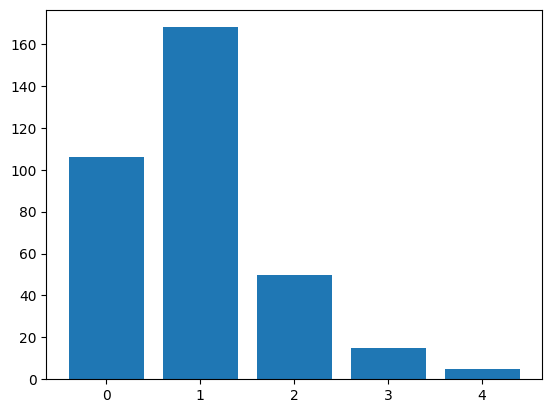

In [43]:
# plot distribution of PROlabels as bar charts
import matplotlib.pyplot as plt

plt.hist(PROlabels_PhF, bins=range(6), align='left', rwidth=0.8)

(array([127., 144.,  42.,  27.,   4.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

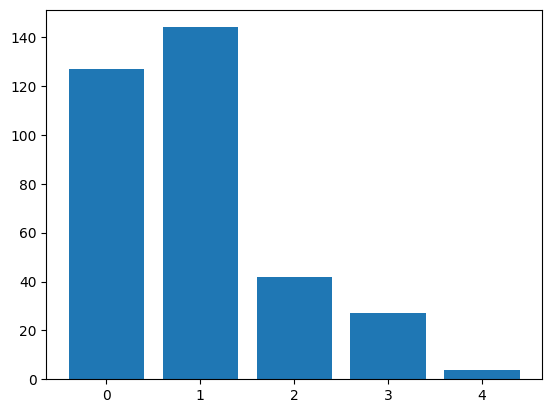

In [44]:
plt.hist(PROlabels_MF, bins=range(6), align='left', rwidth=0.8)

([<matplotlib.axis.XTick at 0x7fc356623700>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

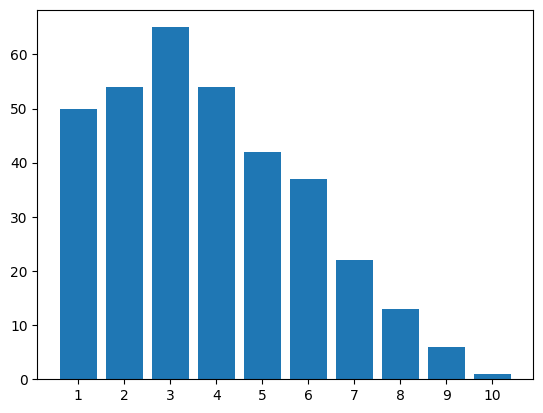

In [54]:
plt.hist(PROlabels_VAS, bins=range(1, 12), align='left', rwidth=0.8)
# set x axis to have intervals of 1
plt.xticks(range(1, 11))

([<matplotlib.axis.XTick at 0x7fc359eef640>,
 [Text(-1, 0, '−1'), Text(0, 0, '0'), Text(1, 0, '1')])

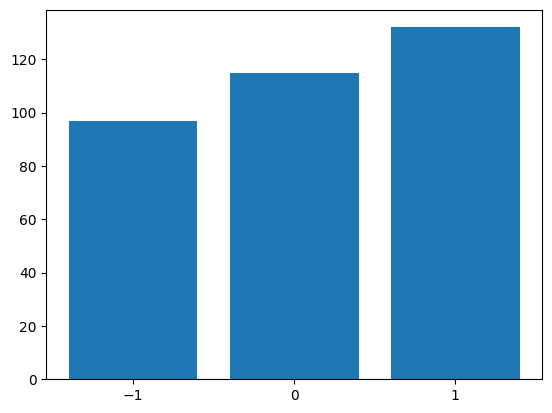

In [56]:
plt.hist(PROlabels_RelP, bins=range(-1, 3), align='left', rwidth=0.8)
plt.xticks(range(-1, 2))

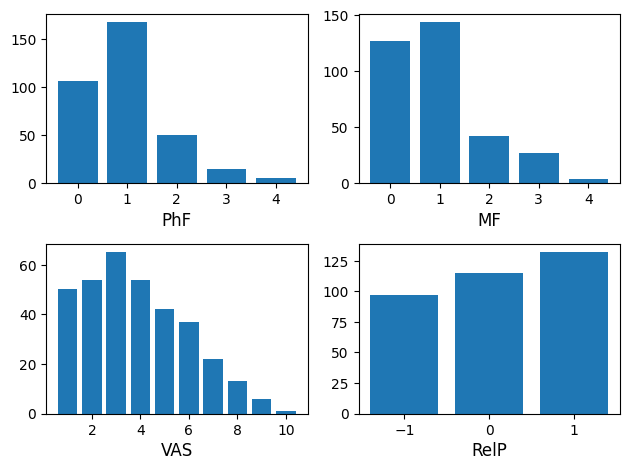

In [67]:
#combine the four plots into one
# set title to bottom of the plot

fig, axs = plt.subplots(2, 2)
# add some horizontal space between plots

axs[0, 0].hist(PROlabels_PhF, bins=range(6), align='left', rwidth=0.8)
axs[0, 0].set_title('PhF', y=-0.3)
axs[0, 1].hist(PROlabels_MF, bins=range(6), align='left', rwidth=0.8)
axs[0, 1].set_title('MF', y=-0.3)
axs[1, 0].hist(PROlabels_VAS, bins=range(1, 12), align='left', rwidth=0.8)
axs[1, 0].set_title('VAS', y=-0.3)
axs[1, 1].hist(PROlabels_RelP, bins=range(-1, 3), align='left', rwidth=0.8)
axs[1, 1].set_title('RelP', y=-0.3)
fig.tight_layout()
plt.show()